In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import sklearn as sk

# from sklearn.neighbors import KNeighborsRegressor

from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
import pandas as pd
import numpy as np

In [3]:
df1 = pd.read_csv("data/raw/Fraudulent_E-Commerce_Transaction_Data.csv")
df2 = pd.read_csv("data/raw/Fraudulent_E-Commerce_Transaction_Data_2.csv")



In [4]:
df = pd.concat([df1,df2], axis=0)

In [5]:
df1.shape

(1472952, 16)

In [6]:
df2.shape

(23634, 16)

In [7]:
df.shape

(1496586, 16)

In [8]:
df['Is Fraudulent'].value_counts()

Is Fraudulent
0    1421526
1      75060
Name: count, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1496586 entries, 0 to 23633
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   Transaction ID      1496586 non-null  object 
 1   Customer ID         1496586 non-null  object 
 2   Transaction Amount  1496586 non-null  float64
 3   Transaction Date    1496586 non-null  object 
 4   Payment Method      1496586 non-null  object 
 5   Product Category    1496586 non-null  object 
 6   Quantity            1496586 non-null  int64  
 7   Customer Age        1496586 non-null  int64  
 8   Customer Location   1496586 non-null  object 
 9   Device Used         1496586 non-null  object 
 10  IP Address          1496586 non-null  object 
 11  Shipping Address    1496586 non-null  object 
 12  Billing Address     1496586 non-null  object 
 13  Is Fraudulent       1496586 non-null  int64  
 14  Account Age Days    1496586 non-null  int64  
 15  Transaction Hour    14

In [10]:
def clean_my_columns(df):
    df.columns = df.columns.str.replace(" ", "_").str.lower().str.strip()
    return df

In [11]:
clean_my_columns(df)
df.columns

Index(['transaction_id', 'customer_id', 'transaction_amount',
       'transaction_date', 'payment_method', 'product_category', 'quantity',
       'customer_age', 'customer_location', 'device_used', 'ip_address',
       'shipping_address', 'billing_address', 'is_fraudulent',
       'account_age_days', 'transaction_hour'],
      dtype='object')

In [12]:
df_num = df.select_dtypes(include='number')



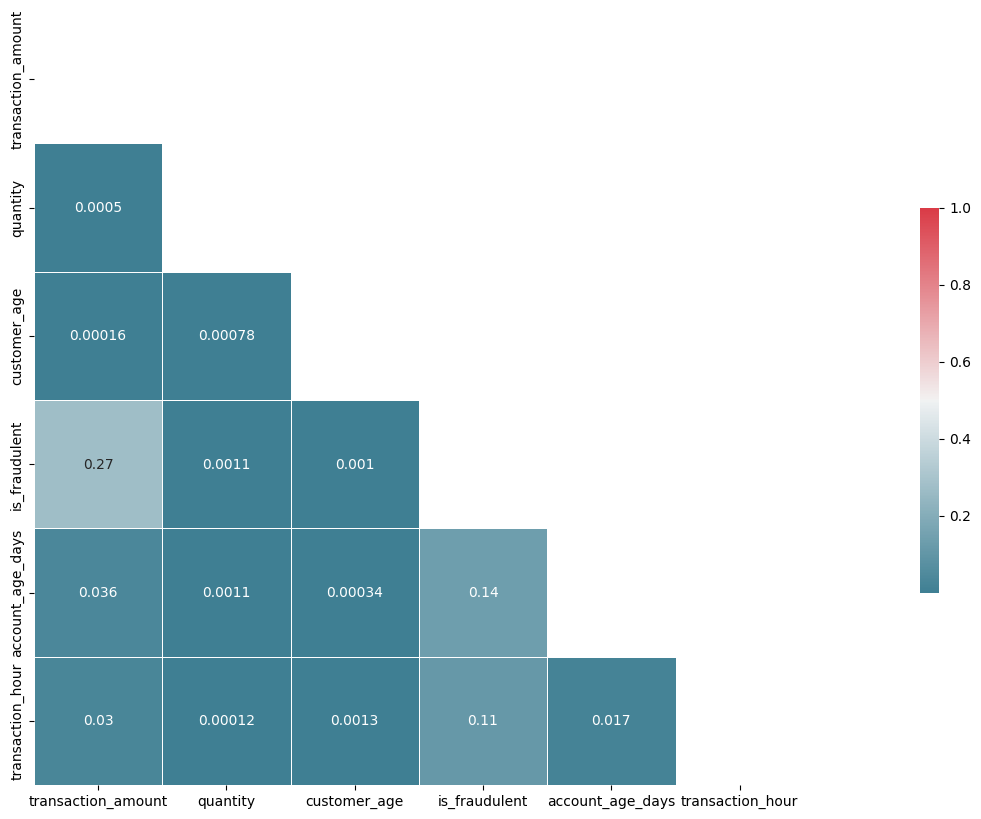

In [13]:
corr = np.abs(df_num.corr())

# Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

In [14]:
# df_tr = df_conv[df_conv['variation'] == 'Test']
# df_ctrl = df_conv[df_conv['variation'] == 'Control']


# df_tr_sample = df_tr.sample(n=20000, random_state=0)
# df_ctrl_sample = df_ctrl.sample(n=20000, random_state=0)

In [17]:
df_fraud = df[df['is_fraudulent'] == 1]
df_non_fraud = df[df['is_fraudulent'] == 0]

In [18]:
fraud_sample = df_fraud.sample(n=75000, random_state=0)

non_fraud_sample = df_non_fraud.sample(n=75000, random_state=0)


In [19]:
fraud_sample.shape

(75000, 16)

In [20]:
non_fraud_sample.shape

(75000, 16)

In [23]:
df_random_sample = pd.concat([fraud_sample,non_fraud_sample], axis=0)
df_random_sample.shape

(150000, 16)

In [24]:
df_num2 = df_random_sample.select_dtypes(include='number')


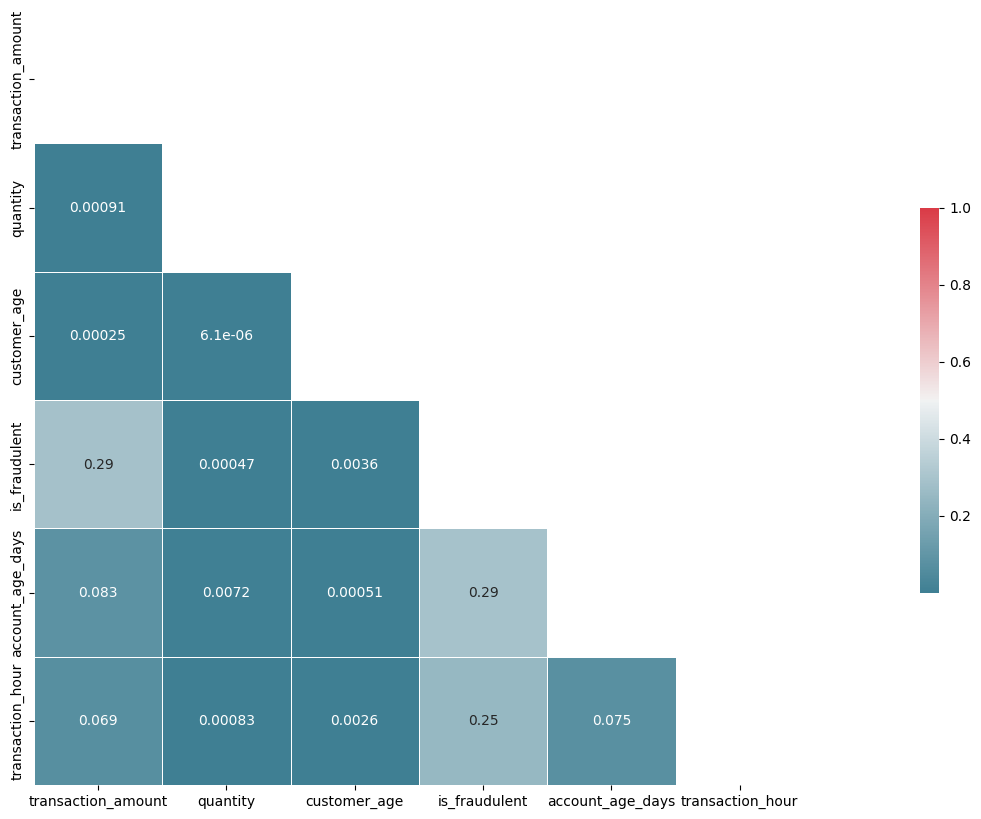

In [25]:
corr = np.abs(df_num2.corr())

# Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(30, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()